### Dataset Description

The dataset contains customer data from a US bank, and is used to predict whether a customer will leave the bank or not.
The dataset was downloaded from Kaggle here: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix)
from xgboost import XGBClassifier
from copy import deepcopy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [5]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
print(data['Geography'].unique())

['France' 'Spain' 'Germany']


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
# checking null values
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
data.shape

(10000, 11)

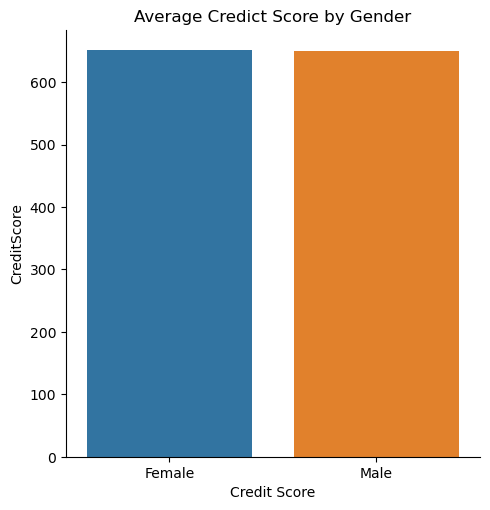

In [11]:
sns.catplot(data=data, x="Gender", y="CreditScore", kind="bar", errorbar=None)
plt.title("Average Credict Score by Gender")
plt.xlabel("Credit Score")
plt.show()

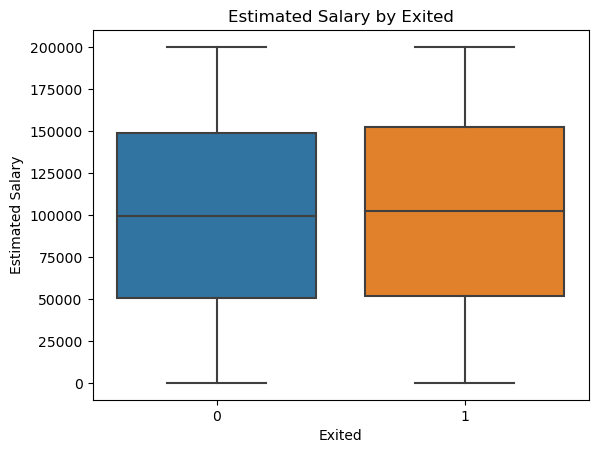

In [12]:
sns.boxplot(data=data, x="Exited", y="EstimatedSalary")
plt.title("Estimated Salary by Exited")
plt.xlabel("Exited")
plt.ylabel("Estimated Salary")
plt.show()

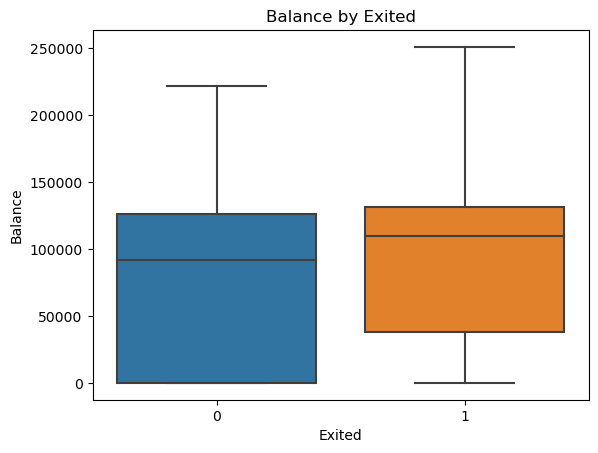

In [13]:
sns.boxplot(data=data, x="Exited", y="Balance")
plt.title("Balance by Exited")
plt.xlabel("Exited")
plt.ylabel("Balance")
plt.show()

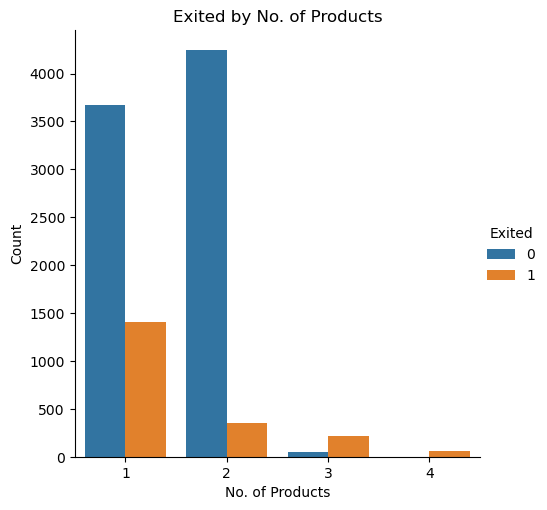

In [14]:
sns.catplot(data=data,x="NumOfProducts", hue="Exited", kind="count")
plt.title("Exited by No. of Products")
plt.xlabel("No. of Products")
plt.ylabel("Count")
plt.show()

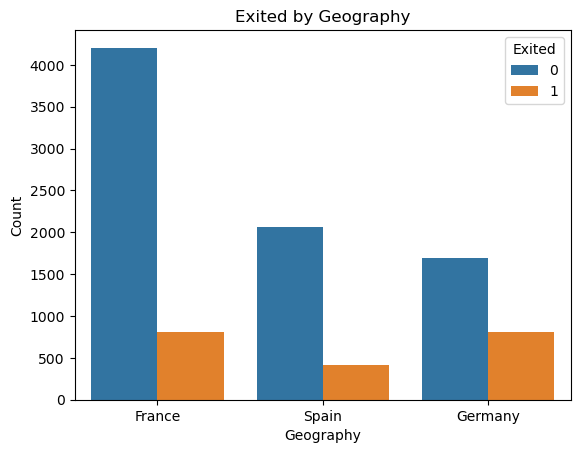

In [15]:
sns.countplot(data=data, x='Geography', hue='Exited')
plt.title("Exited by Geography")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.show()

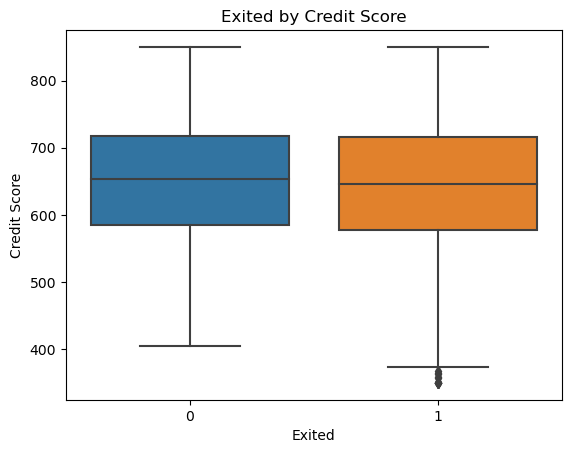

In [16]:
sns.boxplot(data=data, x="Exited", y="CreditScore")
plt.title("Exited by Credit Score")
plt.xlabel("Exited")
plt.ylabel("Credit Score")
plt.show()

### Data Preparation

In [17]:
df = deepcopy(data)

In [18]:
df["Geography"] = df["Geography"].map({'France': 0, 'Spain': 1, 'Germany': 2})
df["Gender"] = df["Gender"].map({'Male': 0, 'Female': 1})

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [20]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [22]:
# scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [23]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [24]:
y_pred_lr = lr_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8166666666666667


In [25]:
fpr, tpr, _ = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

AUC: 0.5858514097962634


In [26]:
print(f"Training Data Score: {lr_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8108571428571428
Testing Data Score: 0.8166666666666667


In [27]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.98      0.89      2389
           1       0.67      0.20      0.30       611

    accuracy                           0.82      3000
   macro avg       0.75      0.59      0.60      3000
weighted avg       0.79      0.82      0.77      3000



### Support Vector Classification

In [28]:
sv_model = SVC()
sv_model.fit(X_train_scaled, y_train)

SVC()

In [29]:
y_pred_svm = sv_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy}')

Accuracy: 0.86


In [30]:
fpr, tpr, _ = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

AUC: 0.684316894330877


In [31]:
print(f"Training Data Score: {sv_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {sv_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8611428571428571
Testing Data Score: 0.86


In [32]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2389
           1       0.84      0.39      0.53       611

    accuracy                           0.86      3000
   macro avg       0.85      0.68      0.72      3000
weighted avg       0.86      0.86      0.84      3000



### KNeighbors Classification

In [33]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [34]:
y_pred_knn = knn_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8326666666666667


In [35]:
fpr, tpr, _ = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

AUC: 0.6775085481122903


In [36]:
print(f"Training Data Score: {knn_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8747142857142857
Testing Data Score: 0.8326666666666667


In [37]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2389
           1       0.64      0.42      0.50       611

    accuracy                           0.83      3000
   macro avg       0.75      0.68      0.70      3000
weighted avg       0.82      0.83      0.82      3000



### Histogram-based Gradient Boosting Classification

In [38]:
hgb_model = HistGradientBoostingClassifier()
hgb_model.fit(X_train_scaled, y_train)

HistGradientBoostingClassifier()

In [39]:
y_pred_hgb = hgb_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_hgb)
print(f'Accuracy:  {accuracy}')

Accuracy:  0.865


In [40]:
fpr, tpr, _ = roc_curve(y_test, y_pred_hgb)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

AUC: 0.7288708681840322


In [41]:
print(f"Training Data Score: {hgb_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {hgb_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.921
Testing Data Score: 0.865


In [43]:
print(classification_report(y_test, y_pred_hgb))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2389
           1       0.75      0.50      0.60       611

    accuracy                           0.86      3000
   macro avg       0.82      0.73      0.76      3000
weighted avg       0.86      0.86      0.85      3000



### XGBoost

In [44]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
y_pred_xgb = xgb_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy:  {accuracy}')

Accuracy:  0.8543333333333333


In [46]:
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

AUC: 0.7276548474013808


In [47]:
print(f"Training Data Score: {xgb_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {xgb_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9615714285714285
Testing Data Score: 0.8543333333333333


In [48]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2389
           1       0.69      0.51      0.59       611

    accuracy                           0.85      3000
   macro avg       0.79      0.73      0.75      3000
weighted avg       0.84      0.85      0.85      3000



In [49]:
# evaluation function
def evaluation(actual, predicted):
    Accuracy = np.round(accuracy_score(actual, predicted), 2) 
    Precision = np.round(precision_score(actual, predicted, average='weighted'), 2) 
    Recall = np.round(recall_score(actual, predicted, average='weighted'), 2) 
    F1_Score = np.round(f1_score(actual, predicted, average='weighted'), 2)
    AUC = np.round(roc_auc_score(actual, predicted), 2) 

    result = {'Accuracy':Accuracy, 'Precision':Precision,'Recall':Recall,'F1_Score':F1_Score, 'AUC':AUC}
  
    return result

In [51]:
lr_evaluation = evaluation(y_test, y_pred_lr)
svm_evaluation = evaluation(y_test, y_pred_svm)
knn_evaluation = evaluation(y_test, y_pred_knn)
hgb_evaluation = evaluation(y_test, y_pred_hgb)
xgb_evaluation = evaluation(y_test, y_pred_xgb)

In [52]:
model_eval = pd.DataFrame({
    "Logistic Regression": lr_evaluation,
    "Support Vector Classfier": svm_evaluation,
    "K-Nearest Neighbors Classifier": knn_evaluation,
    "Histogram-based Gradient Boosting Classification": hgb_evaluation,
    "XGBoost Classification": xgb_evaluation
})
model_eval

,Logistic Regression,Support Vector Classfier,K-Nearest Neighbors Classifier,Histogram-based Gradient Boosting Classification,XGBoost Classification
Accuracy,0.82,0.86,0.83,0.86,0.85
Precision,0.79,0.86,0.82,0.86,0.84
Recall,0.82,0.86,0.83,0.86,0.85
F1_Score,0.77,0.84,0.82,0.85,0.85
AUC,0.59,0.68,0.68,0.73,0.73


The Histogram-based Gradient Boosting Classification model is the best performing model based on the metrics above.

### Hyperparameter Tuning 

In [53]:
hgb_model.get_params()

{'categorical_features': 'warn',
 'class_weight': None,
 'early_stopping': 'auto',
 'interaction_cst': None,
 'l2_regularization': 0.0,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_bins': 255,
 'max_depth': None,
 'max_features': 1.0,
 'max_iter': 100,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 20,
 'monotonic_cst': None,
 'n_iter_no_change': 10,
 'random_state': None,
 'scoring': 'loss',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [54]:
# hyperparameter tuning using GridSearchCV
%%time

param_grid = {
    "learning_rate": (0.01, 0.1, 1, 10),
    "max_leaf_nodes": (3, 10, 30),
    "max_depth": (3, 4, 5, 6, 8, 10, 12, 15)
}
model_grid_search = GridSearchCV(hgb_model, param_grid=param_grid, n_jobs=2, cv=5)
model_grid_search.fit(X_train_scaled, y_train)

CPU times: total: 23.3 s
Wall time: 2min 9s


GridSearchCV(cv=5, estimator=HistGradientBoostingClassifier(), n_jobs=2,
             param_grid={'learning_rate': (0.01, 0.1, 1, 10),
                         'max_depth': (3, 4, 5, 6, 8, 10, 12, 15),
                         'max_leaf_nodes': (3, 10, 30)})

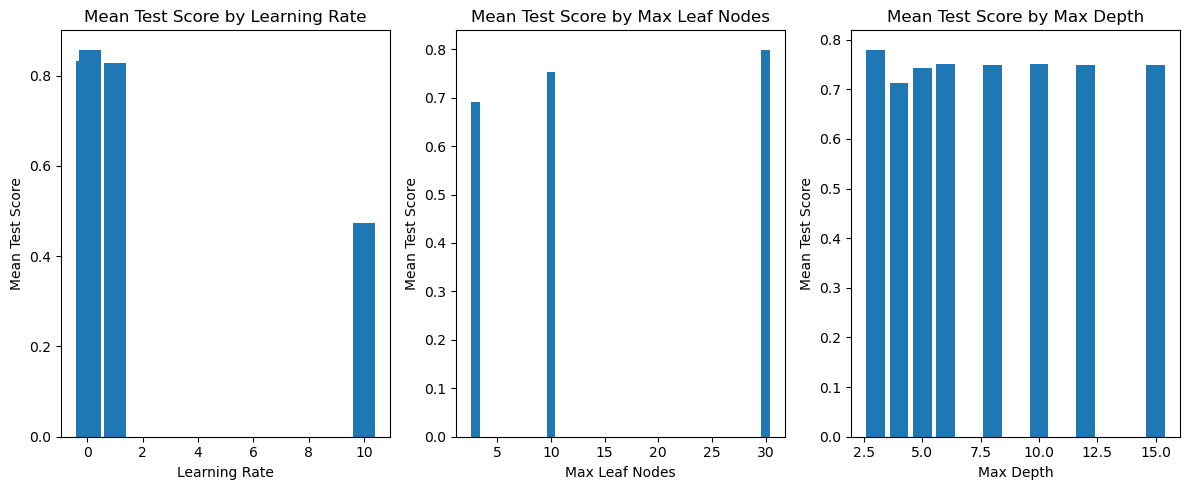

In [56]:
# plotting the accuracy scores for each parameter combination
results = pd.DataFrame(model_grid_search.cv_results_)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

learning_rate_means = results.groupby('param_learning_rate')['mean_test_score'].mean()
axes[0].bar(learning_rate_means.index, learning_rate_means)
axes[0].set_title('Mean Test Score by Learning Rate')
axes[0].set_xlabel('Learning Rate')
axes[0].set_ylabel('Mean Test Score')

max_leaf_nodes_means = results.groupby('param_max_leaf_nodes')['mean_test_score'].mean()
axes[1].bar(max_leaf_nodes_means.index, max_leaf_nodes_means)
axes[1].set_title('Mean Test Score by Max Leaf Nodes')
axes[1].set_xlabel('Max Leaf Nodes')
axes[1].set_ylabel('Mean Test Score')

max_depth_means = results.groupby('param_max_depth')['mean_test_score'].mean()
axes[2].bar(max_depth_means.index, max_depth_means)
axes[2].set_title('Mean Test Score by Max Depth')
axes[2].set_xlabel('Max Depth')
axes[2].set_ylabel('Mean Test Score')

plt.tight_layout()
plt.show()

In [59]:
# getting the best accuracy score from the search
print(model_grid_search.best_score_)

0.8608571428571429


In [60]:
# getting the best parameters
print(model_grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 6, 'max_leaf_nodes': 10}


In [61]:
y_pred_grid = model_grid_search.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_grid)
print(f'Accuracy:  {accuracy}')

Accuracy:  0.868


In [62]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2389
           1       0.78      0.49      0.60       611

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



In [63]:
print(f"Training Data Score: {model_grid_search.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model_grid_search.score(X_test_scaled, y_test)}")

Training Data Score: 0.8794285714285714
Testing Data Score: 0.868


In [64]:
grid_hgb_evaluation = evaluation(y_test, y_pred_grid)

In [65]:
grid_eval = pd.DataFrame({
    "Histogram-based Gradient Boosting Classification": hgb_evaluation,
    "Grid Searched HGB Model": grid_hgb_evaluation, 
})
grid_eval

,Histogram-based Gradient Boosting Classification,Grid Searched HGB Model
Accuracy,0.86,0.87
Precision,0.86,0.86
Recall,0.86,0.87
F1_Score,0.85,0.86
AUC,0.73,0.73


In [66]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_grid)
cm

array([[2306,   83],
       [ 313,  298]], dtype=int64)

In [67]:
# normalizing the confusion matrix
cm = np.around(cm / cm.sum(axis=1)[:, np.newaxis], 2)
print(cm)

[[0.97 0.03]
 [0.51 0.49]]


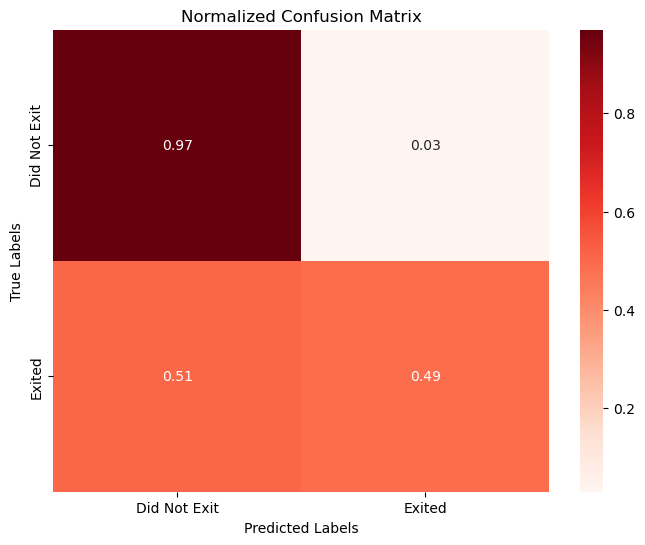

In [74]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='.2f', 
            xticklabels=['Did Not Exit', 'Exited'], yticklabels=['Did Not Exit', 'Exited'])
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()